#### Harmonic chain
We analyze a one-dimensional harmonic chain of $N$ beads connected by springs, each with mass $m$, spring constant $k$, and natural bond length $\ell = 1$. The energy scale is set by $\varepsilon = k \ell^2$, and time is scaled by $\sqrt{m/k}$. 


#### a) Solution of Hamiltonian dynamics 


Integrating: 100%|█████████████████████| 30000/30000 [00:02<00:00, 13464.36it/s]


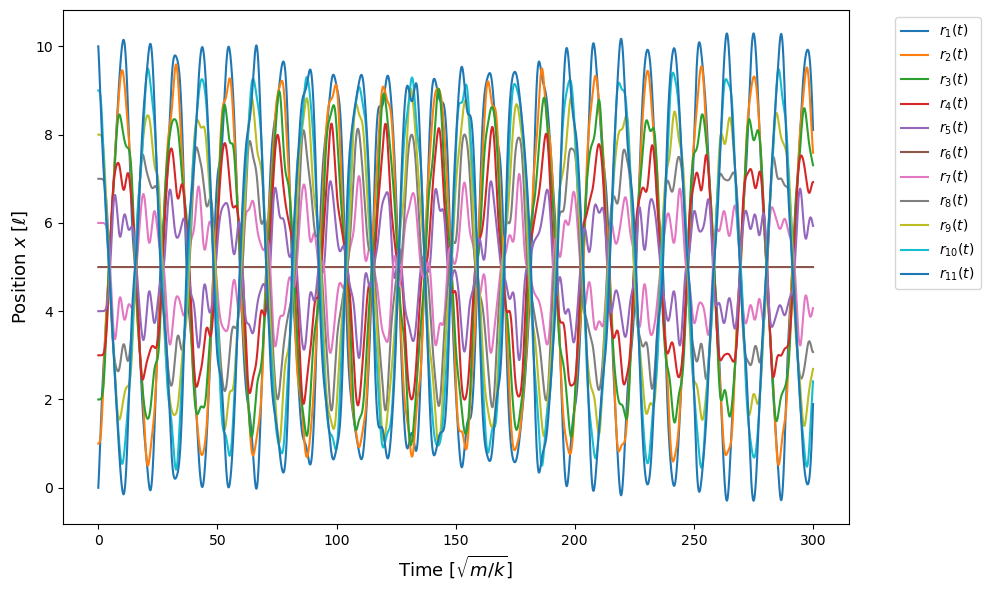

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from integrators.velocity_verlet import velocity_verlet_simulation

# Parameters
N = 11
k = 1.0
m = 1.0
epsilon = 1.0
omega_0_inv = np.sqrt(m / k)
dt = 0.01 * omega_0_inv
t_sim = 300 * omega_0_inv

# Run simulation using new unified integrator
res = velocity_verlet_simulation(N=N, dt=dt, t_sim=t_sim, k=k, m=m, potential_type="harmonic")
positions = res["r_traj"]

# Time array
time = np.arange(positions.shape[0]) * dt

# Plot positions
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(time, positions[:, i, 0], label=f"$r_{{{i+1}}}(t)$")
plt.xlabel(r"Time $[\sqrt{m/k}]$",fontsize=13)
plt.ylabel(r"Position $x \; [\ell]$", fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


-The central bead does not move due to the high symmetry of the initial conditions. 

-All other beads perform quasi-periodic motion due to the superposition of many normal modes.

-At first sight, it looks as if the patterns were repeating. A closer look however, shows the patters are not exactly periodic, which is expected in a multi-mode system.

-Because the system is finite and linear, it does not thermalize — which is why you observe recurrence rather than equilibration

#### b) Temperature Prediction from equipartition 


The system is initialized such that:
- All beads are at rest at positions $r_i(0) = i\ell \hat{x}$,
- The momenta are zero **except**:
 $ p_1(0) = +\frac{1}{2} \sqrt{m\varepsilon}, \quad p_N(0) = -\frac{1}{2} \sqrt{m\varepsilon} $

This gives an initial total energy that is **purely kinetic**, computed as:
$ E_{\text{tot}} = \sum_{i=1}^N \frac{p_i^2}{2m} = 2 \cdot \frac{1}{2m} \left( \frac{1}{2} \sqrt{m\varepsilon} \right)^2 = \frac{\varepsilon}{4}$



According to the **virial theorem**, in a harmonic system, the time-averaged kinetic and potential energies are equal. Therefore:
$ \langle K \rangle = \frac{E_{\text{tot}}}{2} = \frac{\varepsilon}{8} $


Each bead in 1D contributes **1 quadratic degree of freedom**, for $N$ beads:
$ \langle K \rangle = \frac{1}{2} 2N k_B T$

Solving for temperature $T$:

$ T = \frac{\langle K \rangle}{\frac{N}{2}k_B} $

Theoretical prediction:

$T = \frac{\varepsilon}{4N k_B} $

---


- the **predicted temperature** decreases as $1/N$
- **Finite time not sufficient** to fully thermalize the system — energy may not have spread evenly across beads for large $N$


Integrating: 100%|█████████████████████| 30000/30000 [00:00<00:00, 30426.68it/s]


N=  2 | T_pred = 0.1250, T_num = 0.3056, rel.error = 1.4451


Integrating: 100%|█████████████████████| 30000/30000 [00:01<00:00, 25960.92it/s]


N=  3 | T_pred = 0.0833, T_num = 0.3344, rel.error = 3.0133


Integrating: 100%|█████████████████████| 30000/30000 [00:02<00:00, 12105.56it/s]


N= 11 | T_pred = 0.0227, T_num = 0.2722, rel.error = 10.9783


Integrating: 100%|██████████████████████| 30000/30000 [00:18<00:00, 1614.72it/s]


N=100 | T_pred = 0.0025, T_num = 0.2526, rel.error = 100.0311


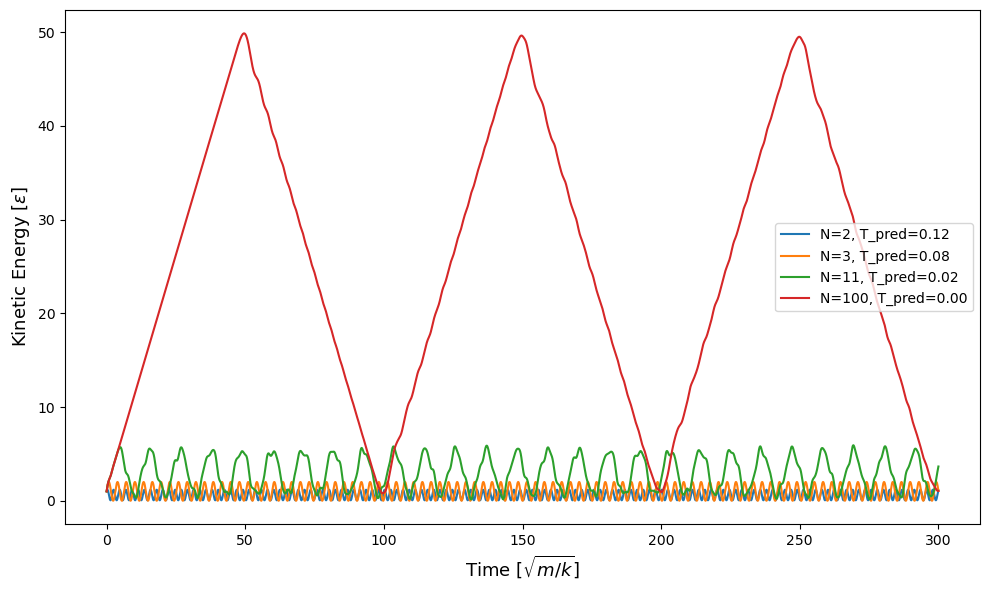

In [2]:
from utils.help_functions import analyze_temperature

N_values = [2, 3, 11, 100]
analyze_temperature(N_values)

Initially, all bonds are relaxed (at their equilibrium length), so that no potential energy is stored. The total energy is given by $E_\mathrm{tot} = 2 \times |\vec p_1|^2 / 2m = \epsilon/4$.
There are $2N$ (active) degrees of freedom if $N$ is even. For $N$ odd, we have only $2(N-1)$ due to the resting central bead. The equipartition principle says that the total energy is, on average, equally distributed on all accessible degreeds of freedom.
Since there is a momentum for every position, the number of kinetic and potential dofs is equal and $\overline{E_\mathrm{kin}} = \overline{E_\mathrm{pot}}$.
The second statement is that every harmonic d.o.f. receives $k_B T/2$, in particular, the $N$ (or $N-1$) momenta.
For $N$ even (and similarly for odd), we have
$\overline{E_\mathrm{kin}} = N k_B T/2$ and thus

$k_B T = \frac{E_\mathrm{tot}}{N} = \frac{\epsilon}{4N} \,.$


#### c) End-to-end distance 

 **end-to-end distance** $ R_e(t) = |\mathbf{r}_N(t) - \mathbf{r}_1(t)| $reflects the chain's average extension and conformational fluctuations.

To approximate thermal behavior, we initialize the system using **random Gaussian momenta**:

$p_{i,x}(0) \sim \mathcal{N}(0, m \varepsilon)$

This ensures that kinetic energy is distributed in a statistically consistent way with thermal equilibrium.

We simulate the chain using the velocity-Verlet algorithm and compute:

- The **time evolution** of $ R_e(t) $,
- Its **time average** $ \langle R_e \rangle $,
- Repeat the experiment **3 times** per chain length with different random seeds.

This allows us to examine the dependence of chain extension on system size and assess the impact of thermal fluctuations.


--- N=2 ---


Integrating: 100%|█████████████████████| 30000/30000 [00:00<00:00, 37114.01it/s]


Average ⟨Re⟩ = 1.027 ± 0.000


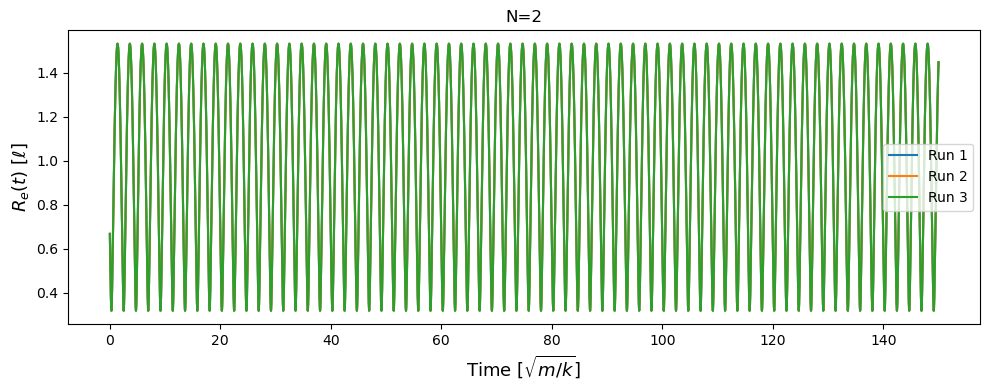

--- N=3 ---


Integrating: 100%|█████████████████████| 30000/30000 [00:01<00:00, 29354.73it/s]


Average ⟨Re⟩ = 1.697 ± 0.166


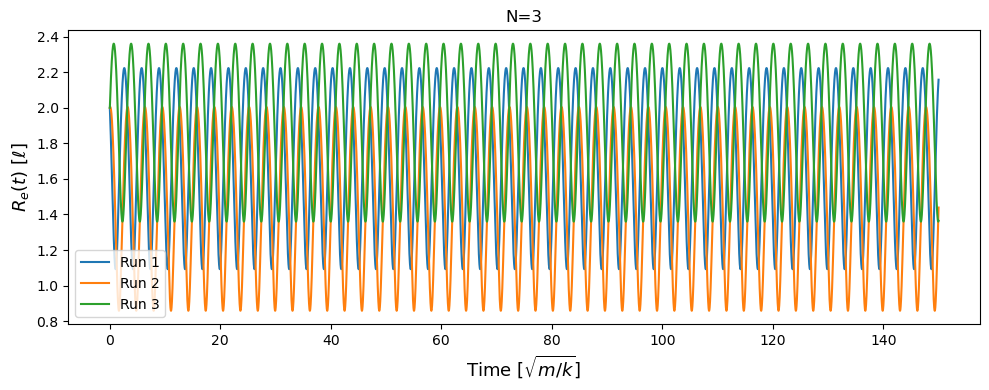

--- N=11 ---


Integrating: 100%|█████████████████████| 30000/30000 [00:02<00:00, 12534.19it/s]


Average ⟨Re⟩ = 6.951 ± 0.362


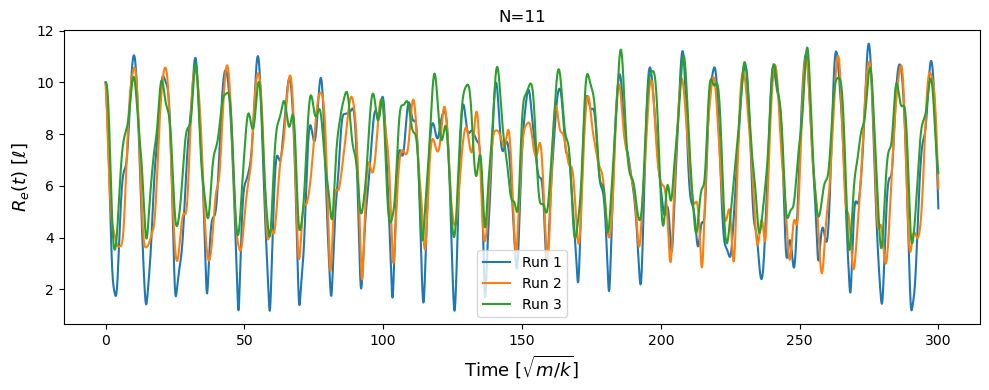

--- N=100 ---


Integrating: 100%|██████████████████████| 30000/30000 [00:18<00:00, 1620.86it/s]


Average ⟨Re⟩ = 51.971 ± 0.540


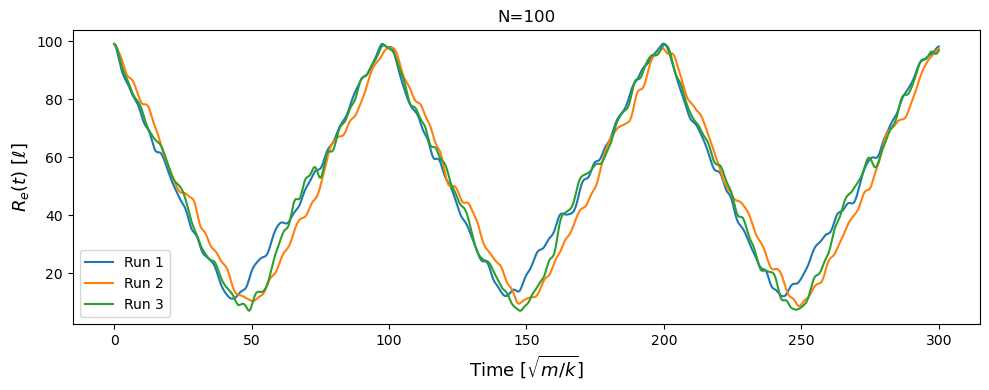

In [3]:
from utils.help_functions import analyze_end_to_end


N_array, Re_avg_array, Re_std_array = analyze_end_to_end(N_values)


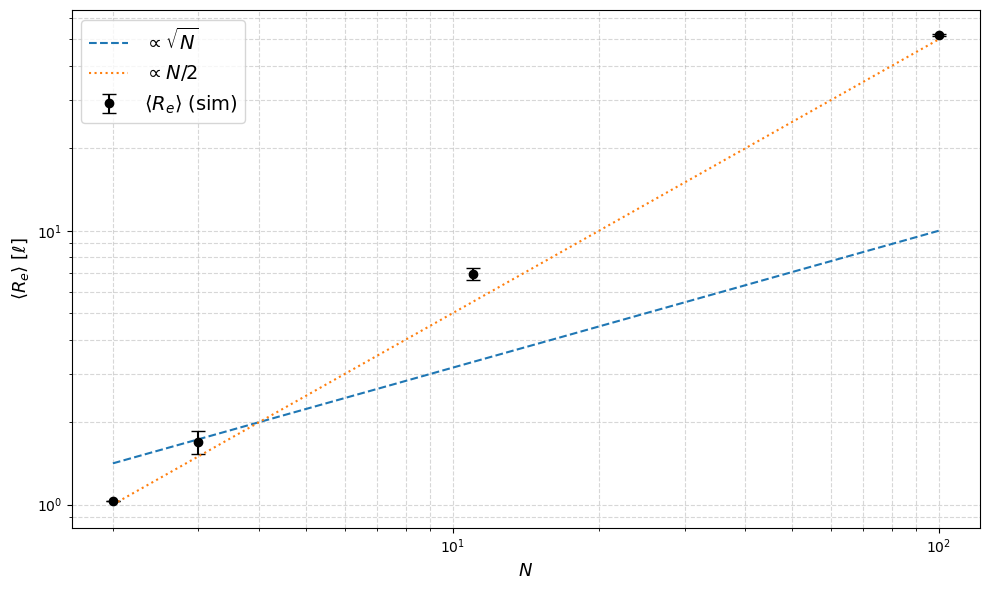

In [4]:
plt.figure(figsize=(10, 6))
plt.errorbar(N_array, Re_avg_array, yerr=Re_std_array, fmt='o', capsize=5, label=r'$\langle R_e \rangle$ (sim)', color='black')

# Reference scaling laws
plt.plot(N_array, np.sqrt(N_array), '--', label=r'$\propto \sqrt{N}$')
plt.plot(N_array, N_array / 2, ':', label=r'$\propto N/2$')

# Log-log axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=13)
plt.ylabel(r'$\langle R_e \rangle$ [$\ell$]', fontsize=13)
plt.legend(fontsize=14)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()



#### d) Recurrence in phase space

To study the recurrence properties of a harmonic chain, we define a distance function in 6N-dimensional phase space:

$
d(\omega(t), \omega_0) = \left( \frac{1}{6N} \sum_{i=1}^N \left[ k |\mathbf{r}_i(t) - \mathbf{r}_i^0|^2 + \frac{|\mathbf{p}_i(t) - \mathbf{p}_i^0|^2}{m} \right] \right)^{1/2}
$

We:
- Select a reference state $\omega_0$ at time $t_0 = 10 \tau$,
- Monitor the distance $d(t)$ over a long time window $t \in [10, 20000]\tau$,
- Determine the recurrence time $T_{\text{per}}$ where $d(t)$ reaches a minimum.

##### Conclusions:
- For $N = 10$, recurrence occurs earlier and more sharply,
- For $N = 20$, the minimum of $d(t)$ is broader and occurs later,
- This suggests that **recurrence time increases with chain length**, likely scaling faster than linear (possibly $\sim N^2$ or worse).

Such recurrence is expected in **integrable systems** like harmonic chains, though degraded by numerical errors or mode mixing over long times.


In [5]:
from utils.help_functions import analyze_recurrence_integrator #FIXME